In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

from utils import plot_heatmap

In [12]:
df = pd.read_csv("val_PM.csv")
moa_map = pd.read_csv(
    "nsc_cid_smiles_class_name.csv", usecols=["NSC", "MECHANISM"]
).dropna()
moa_map["NSC"] = moa_map["NSC"].astype(int)
df["NSC"] = df["NSC"].astype(int)

df_moa = df.merge(moa_map, on="NSC", how="left")
df_moa

,NSC,drug,gene,num,rank,MECHANISM
0,740,Methotrexate,TYMS,67,3,DNA
1,740,Methotrexate,ATIC,67,1,DNA
2,752,Thioguanine,BST2,0,5,DNA
3,752,Thioguanine,APBB1IP,0,1,DNA
4,752,Thioguanine,SLC43A3,2,3,DNA
...,...,...,...,...,...,...
4875,820919,4-methyl-3-(1-methyl-6-(pyridin-3-yl)-1H-pyraz...,LOC100128816,0,1,Other
4876,820919,4-methyl-3-(1-methyl-6-(pyridin-3-yl)-1H-pyraz...,PSMB8,0,5,Other
4877,820919,4-methyl-3-(1-methyl-6-(pyridin-3-yl)-1H-pyraz...,SPG20,0,3,Other
4878,820919,4-methyl-3-(1-methyl-6-(pyridin-3-yl)-1H-pyraz...,LITAF,0,4,Other


In [13]:
df_moa[df_moa.drug == "Dasatinib"]

,NSC,drug,gene,num,rank,MECHANISM
1551,732517,Dasatinib,FYN,41,1,Kinase
1554,732517,Dasatinib,STAT5B,5,3,Kinase
1561,732517,Dasatinib,ABL1,300,4,Kinase
1562,732517,Dasatinib,ZNF667-AS1,0,5,Kinase
1565,732517,Dasatinib,CSK,47,2,Kinase
2512,759877,Dasatinib,FYN,41,1,Kinase
2513,759877,Dasatinib,CSK,47,2,Kinase
2514,759877,Dasatinib,STAT5B,5,3,Kinase
2515,759877,Dasatinib,EPHA2,36,4,Kinase
2524,759877,Dasatinib,ABL2,13,5,Kinase


24it [00:08,  2.89it/s]


<Figure size 9000x4500 with 0 Axes>

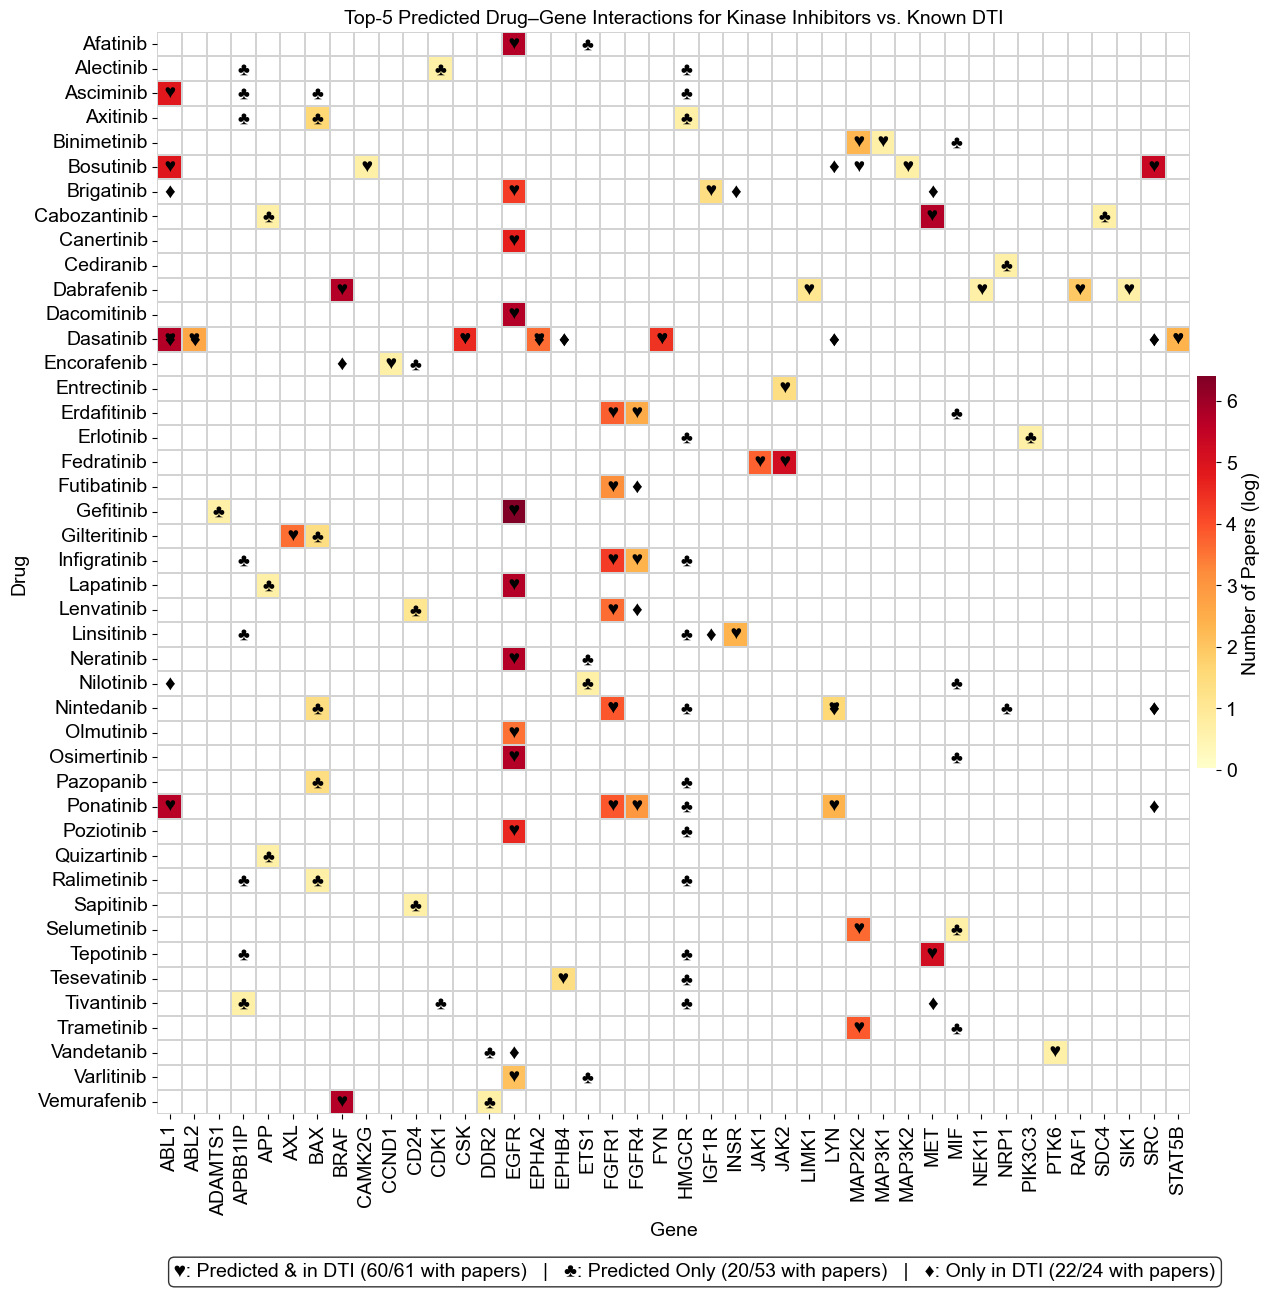

In [4]:
plot_heatmap(df_moa, MOA_name="Kinase", specific_drug="nib")

1it [00:00,  2.88it/s]


<Figure size 9000x4500 with 0 Axes>

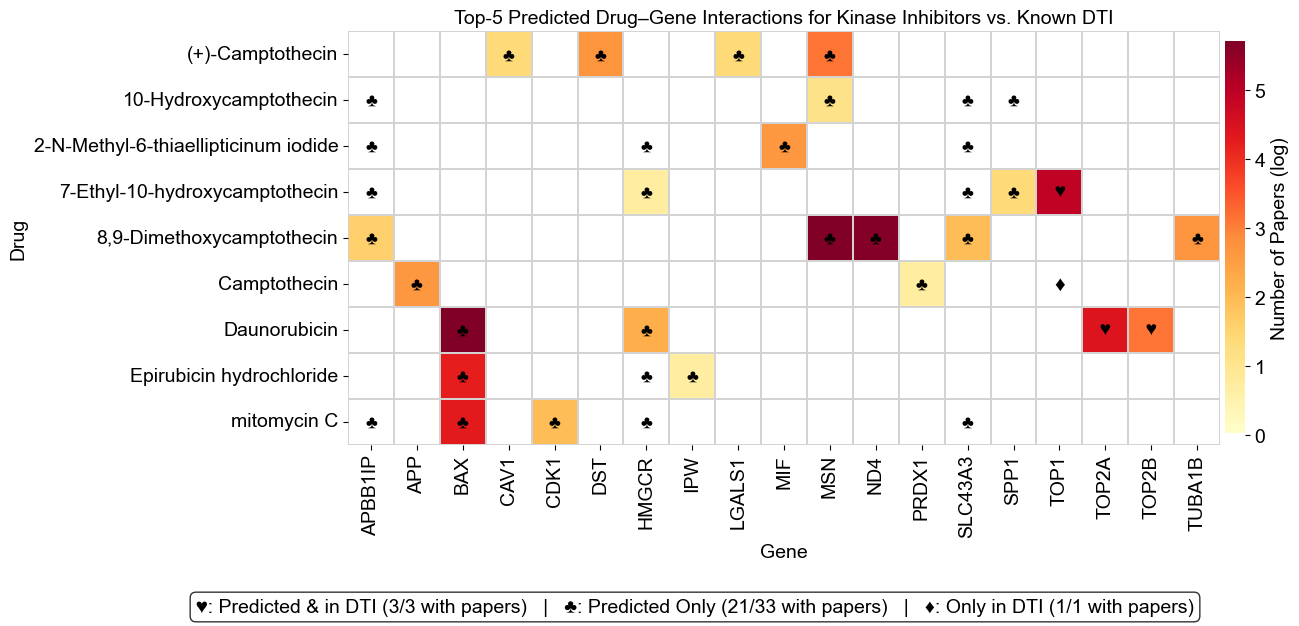

In [5]:
plot_heatmap(df_moa, MOA_name="DNA", specific_drug="cin", legend_loc=(0.5, 0.32))

In [6]:
df_moa.to_csv("moa_with_top5.csv")

# Data Statistics

In [7]:
df = pd.read_csv("val_PM.csv")

In [8]:
dti = pd.read_csv("nci_dti.csv", index_col=0)[["NSC", "Drug Name", "Gene"]]
dti.columns = ["NSC", "drug", "gene"]
dti.NSC = dti.NSC.astype(int)
dti.head()

,NSC,drug,gene
1138,3061,Pyrimethamine,DHFR
1139,757306,Pyrimethamine,DHFR
1140,3061,Pyrimethamine,HEXB
1141,757306,Pyrimethamine,HEXB
1189,633781,Lovastatin,HMGCR


In [9]:
# NSCベースのキーのみを作成
df["key1"] = df["NSC"].astype(str) + "_" + df["gene"]
dti["key1"] = dti["NSC"].astype(str) + "_" + dti["gene"]

# key1 のみでセットを作成
key1_set = set(dti["key1"].dropna())

# NSCベースの dti_existed フラグを立てる
df["dti_existed"] = df["key1"].isin(key1_set).astype(int)

# 不要な一時列を削除
df = df.drop(columns=["key1"])

# predicted_positive フラグも再計算
df["predicted_positive"] = (df["num"] > 0).astype(int)

In [10]:
# lowercase統一
df["drug_gene"] = df["NSC"].astype(str) + "_" + df["gene"].str.upper()
dti["drug_gene"] = dti["NSC"].astype(str) + "_" + dti["gene"].str.upper()

# セット比較
predicted_keys = set(df["drug_gene"])
dti_keys = set(dti["drug_gene"])

# DTIにあるが予測に出なかったもの
missed_dti_completely = dti[~dti["drug_gene"].isin(predicted_keys)]

# 件数と例を表示
print("Completely missed known DTI:", len(missed_dti_completely))

Completely missed known DTI: 361


In [11]:
ith

{'Total Predictions': 4880,
 'Unique Drugs': 932,
 'Unique Genes': 297,
 'Unique NSC IDs': 976,
 'Novel Predictions (not in DTI)': 4669,
 'PubMed-supported Novel Predictions': 182,
 'Known DTI in dataset': 211,
 'PubMed-supported Known DTI': 174,
 'Known DTI PubMed Recall': 0.8246,
 'Completely Missed Known DTI': 361,
 'Total Papers': 16831,
 'Total PubMed Hits': 356,
 'Fraction of PubMed Hits that are Novel': 0.5112,
 'Fraction of Drugs with PubMed Hit in Top-5': 0.1931,
 'Fraction of Novel Drugs with PubMed Hit in Top-5': 0.122,
 'Fraction of Known Drugs with PubMed Hit in Top-5': 0.8509,
 'Top-5 PubMed Precision': 0.073}

## 📊 Summary of drGAT Prediction Results

This summary highlights the predictive power and interpretability of the **drGAT** model, validated via PubMed literature evidence.

### 🧬 Dataset Overview

| Metric                       | Value | Description                                                   |
|-----------------------------|-------|---------------------------------------------------------------|
| Total Predictions           | 4,880 | All predicted drug–gene interactions (top-5 per drug).        |
| Unique Drugs                | 932   | Number of distinct drug names.                                |
| Unique NSC IDs              | 976   | Number of unique compound identifiers.                        |
| Unique Genes                | 297   | Number of gene targets.                                       |

---

### ✅ Known DTI Recovery

| Metric                            | Value  | Description                                                                 |
|----------------------------------|--------|-----------------------------------------------------------------------------|
| Known DTIs in Prediction         | 211    | Pairs found in the reference DTI database.                                 |
| PubMed-supported Known DTIs      | 174    | Known DTIs with at least one supporting PubMed article.                    |
| **Known DTI PubMed Recall**      | 0.825  | Fraction of known DTIs recovered with literature support.                  |
| Completely Missed Known DTIs     | 361    | Known DTIs not recovered in top-5 predictions.                             |
| Fraction of Known Drugs w/ Hits  | 0.851  | Known drugs with ≥1 PubMed-supported prediction in top-5.                  |

---

### 🌱 Novel Prediction Validation

| Metric                                 | Value  | Description                                                                 |
|----------------------------------------|--------|-----------------------------------------------------------------------------|
| Novel Predictions (Not in DTI)         | 4,669  | Model predictions not included in the known DTI database.                  |
| PubMed-supported Novel Predictions     | 182    | Novel predictions backed by at least one PubMed article.                   |
| **Fraction of PubMed Hits that are Novel** | 0.511 | Over half of literature-supported predictions are novel.                   |
| Fraction of Novel Drugs w/ Hits        | 0.122  | Novel drugs with at least one PubMed-supported gene in top-5.              |

---

### 📚 PubMed Evidence

| Metric                      | Value   | Description                                                        |
|----------------------------|---------|--------------------------------------------------------------------|
| Total Papers Queried       | 16,831  | Number of articles retrieved across all predictions.              |
| Total PubMed Hits          | 356     | Predicted drug–gene pairs supported by at least one article.      |
| **Top-5 PubMed Precision** | 0.073   | Proportion of top-5 predictions supported by literature.          |
| Fraction of Drugs w/ Hits  | 0.193   | All drugs with ≥1 PubMed-supported gene in top-5 predictions.     |

---

### 📝 Key Takeaways

- ✅ **High recall for known DTIs**: 82.5% of known drug–target interactions (DTIs) are backed by PubMed.
- 🌱 **Strong novelty**: Over **50%** of PubMed-supported predictions are **novel**, not in the DTI database.
- 🔍 **Interpretability via attention**: Almost 20% of drugs have top-5 predictions supported by PubMed, highlighting useful attention-based ranking.
- ⚠️ **Room for precision improvement**: The overall **top-5 PubMed precision is 7.3%**, suggesting that additional filtering or re-ranking strategies may be beneficial.
